<img src="../logo.png" align="right" width="150" />

#### Teoría de Circuitos II

# Trabajo Semanal 3
#### *Tobias Bavasso Piizzi*

La resolución detallada se puede encontrar [aquí](https://gitlab.frba.utn.edu.ar/tbavassopiizzi/tcii/-/blob/master/Tareas-Semanales/TrabajoSemanal4/ej4.pdf) 



## Ejercicio 1

### Función Transferencia

La Función transferencia buscada responde a la forma

\begin{equation}
\label{eqn:n1}\tag{1}
T_{(s)} = k \cdot \frac{s - z}{s + p}
\end{equation}
$z = p = \sigma$

De esta forma lograremos tener un pasa todo y en base a la frecuencia que se utilice se rotará la fase. En otras palabras estamos buscando un __*Filtro Pasa Todo*__

Entonces la función transferencia tendrá la forma

\begin{equation}
\label{eqn:n2}\tag{2}
T_{(s)} =\frac{s - \sigma}{s + \sigma}
\end{equation}

### Implementación Pasiva

Para lograr una implementación pasiva de la misma se puede utilizar el circuito __*lattice*__

<img src="./lattice_pasivo_cir.png" align="center" width="500" />


\begin{equation}
\label{eqn:n3}\tag{3}
T_{(s)} =\frac{1}{2}\frac{s - \sigma}{s + \sigma}
\end{equation}

\begin{equation}
\sigma = \frac{1}{R \cdot C}
\end{equation}


Si ahora quisieramos diseñar para tener una cierta rotación de fase respecto al comienzo solo habría que realizar el estudio de su comportamiento.

\begin{equation}
\label{eqn:n4}\tag{4}
\phi{(\omega)} = \arctan (\frac{- \omega}{\sigma}) - \arctan (\frac{\omega}{\sigma})
\end{equation}

\begin{equation}
\label{eqn:n5}\tag{5}
\phi{(\omega = 1)}= \frac{\pi}{12} = \arctan (\frac{- 1}{\sigma}) - \arctan (\frac{1}{\sigma})
\end{equation}

\begin{equation}
\frac{1}{\sigma} = 0.1316
\end{equation}

\begin{equation}
R \cdot C = 0.1316
\end{equation}

Adopto los valores de la tabla y no considero ninguna normalización en frecuencia ya que en un filtro pasatodo carece de sentido

| Compo  | Valor | $\Omega z$ |
| -- | -- | -- |
| R | 0.5  | 50k$\Omega$ | 
| C | 0.26 | 2.632 pf | 

\begin{equation}
\label{eqn:n6}\tag{6}
T_{(s)} =\frac{1}{2}\frac{s - 7.59}{s + 7.59}
\end{equation}

### Simulación Circuital

<img src="./lattice_pasivo_bode.png" align="center" width="1000" />

Con la ayuda de los cursores vemos que para la pulsación angular pedida la fase disminuye 15° como se pretendía


### Simulación matemática


<IPython.core.display.Math object>

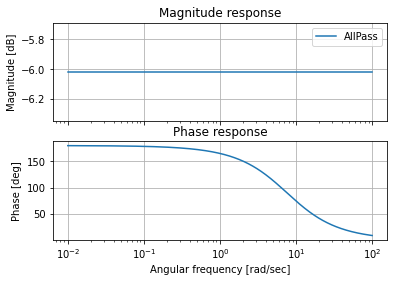

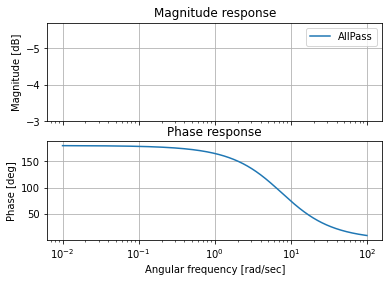

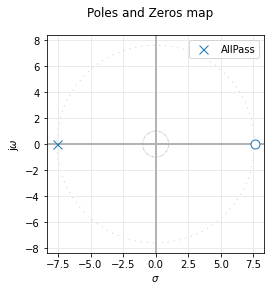

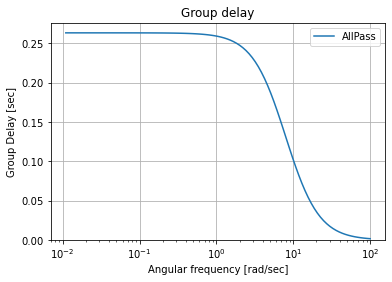

In [1]:
import scipy.signal as sig
import matplotlib as mpl
from splane import analyze_sys, pretty_print_lti
import numpy as np
#%matplotlib qt5

z = [7.59]
p = [-7.59]
k = 0.5

this_lti = sig.ZerosPolesGain(z, p, k).to_tf()

pretty_print_lti(this_lti)

analyze_sys( [this_lti], ["AllPass" ])


### Implementación Activa

<img src="./lattice_activo_cir.png" align="center" width="250" />

Este circuito nos presenta una transferencia que también nos permite realizar un __*Filtro Pasa Todo*__

\begin{equation}
\label{eqn:n7}\tag{7}
T_{(s)} = - k \cdot \frac{s - \frac{1}{C \cdot R2 \cdot k }}{s - \frac{1}{C \cdot R2}}
\end{equation}

\begin{equation}
k = \frac{RF}{R1} = 1
\end{equation}

Vemos que los __*valores que anteriormente utilizamos siguen siendo válidos ya que forzamos al grado de libertad k = 1*__. 

| Compo  | Valor | $\Omega z$ |
| -- | -- | -- |
| R | 0.5  | 50k$\Omega$ | 
| C | 0.26 | 2.632 pf | 
| Rk | 0.1  | 10k$\Omega$ |


#### Simulación Circuital

<img src="./lattice_active_bode.png" align="center" width="1000" />

Nuevamente se observa como la fase se comporta de la misma forma, pero ahora la __*ganancia es unitaria*__.




## Ejercicio 2

\begin{equation}
\label{eqn:n8}\tag{8}
T_{(s)} = k \cdot \frac{s^{2} + s \cdot \frac{\omega_n}{Q_n} + \omega_n^{2}}{s^{2} + s \cdot \frac{\omega_p}{Q_p} + \omega_p^{2}} 
\end{equation}

Sabiendo que el donominador responde a un __*Butter de 2° Orden*__ ya puedo conocer el polinomio de la transferecnia

\begin{equation}
q{(s)} = s^{2} + s \cdot \sqrt{2} + 1 
\end{equation}

Para lograr las respuestas solicitadas es necesario __*colocar correctamente los Z*__.

### Notch Normalizado Pasabajo

Planteando la siguiente transferecnia podemos obtener la respuesta buscada. Tendremos que colocar un par de __*Z complejos conjugados por encima de la circunferencia unitaria*__

\begin{equation}
\label{eqn:n9}\tag{9}
T_{(s)} = k \cdot \frac{s^{2} + 2^{2}}{s^{2} + s \cdot \sqrt{2} + 1} 
\end{equation}

#### Simulación Matemática

<IPython.core.display.Math object>

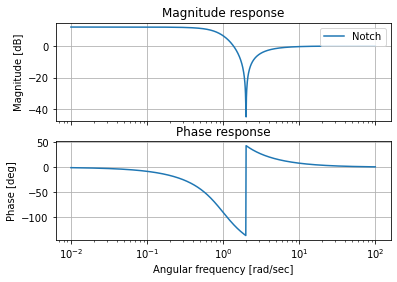

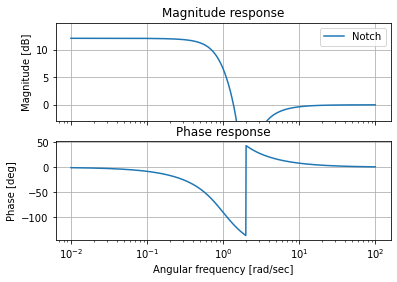

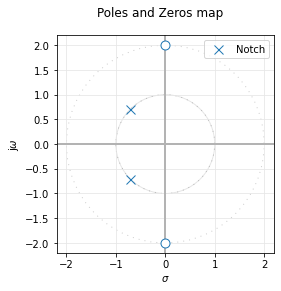

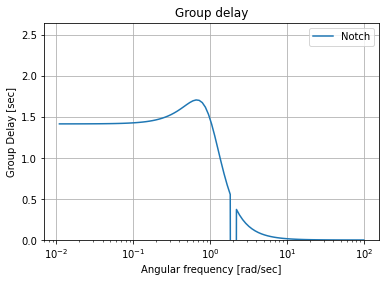

In [2]:
#n1 = [ 1 , np.sqrt(2)/2 , 1 ]
n2 = [ 1 , 0 , 4]

p = [ 1 , np.sqrt(2) , 1]
k = 1

#tf_be   = sig.TransferFunction(n1,p)
tf_n    = sig.TransferFunction(n2,p)
pretty_print_lti(this_lti)

#analyze_sys( [tf_be], ["BE" ])

analyze_sys( [tf_n], ["Notch" ])

#### Implementación

El circuito a realizar debe ser activo si o si porque para bajas frecuencias tenemos ganancia superior a 10 dB.

Este Ackerberg-Mossberg tiene la particularidad que varios componentes están levantados lo cual nos permite lograr una transferecia como la siguiente

\begin{equation}
\label{eqn:n10}\tag{10}
T_{(s)} = \frac{-a \cdot s^{2} + d \cdot \omega_o^{2}} {s^{2} + s \cdot \frac{\omega_o}{Q} + \omega_o^{2}} 
\end{equation}

<img src="./notch_ack.png" align="center" width="1000" />

Adoptamos las siguientes condiciones

a = 1
d = 4

\begin{equation}
\label{eqn:n11}\tag{11}
T_{(s)} = - \frac{s^{2} + 4}{s^{2} + s \cdot \sqrt{2} + 1} 
\end{equation}

$\Omega_w = 2 \cdot \pi \cdot 1KHz$
$\Omega_z = 1k\omega$

| Compo  | Valor nor | Valor |
| -- | -- | -- |
| R | 1  | 1k$\Omega$ | 
| C | 1 | 79.57 nf | 

#### Simulación Circuital

<img src="./notch_bode.png" align="center" width="1000" />



### Elimina Banda

En este caso se debe analizar la respuesta en módulo del filtro según las especificaciones solicitadas. Obviamente __*todas las singularidades estarán en la circunferencia unitaria*__

\begin{equation}
\label{eqn:n12}\tag{12}
|T|_{\omega = 1} = \frac{Q}{Q_z} = 0.5 
\end{equation}

\begin{equation}
|Q_z = \sqrt{2}
\end{equation}

\begin{equation}
\label{eqn:n13}\tag{13}
T_{(s)} = - \frac{s^{2} + s \cdot \frac{\sqrt{2}}{2} + 1}{s^{2} + s \cdot \sqrt{2} + 1} 
\end{equation}


#### Simulación Matemática

<IPython.core.display.Math object>

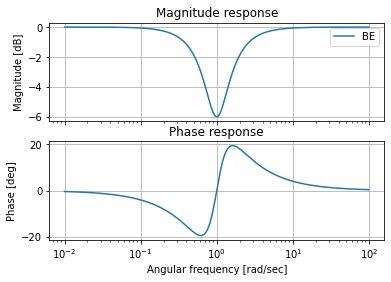

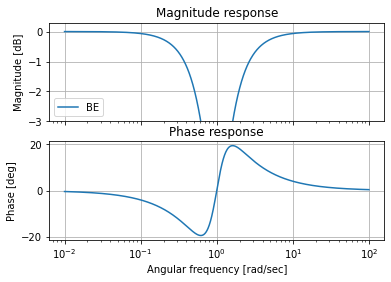

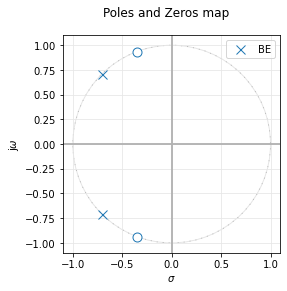

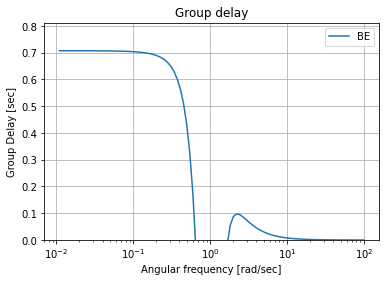

In [3]:
n1 = [ 1 , np.sqrt(2)/2 , 1 ]
n2 = [ 1 , 0 , 4]

p = [ 1 , np.sqrt(2) , 1]
k = 1

tf_be   = sig.TransferFunction(n1,p)
tf_n    = sig.TransferFunction(n2,p)

pretty_print_lti(this_lti)

analyze_sys( [tf_be], ["BE" ])

#analyze_sys( [tf_n], ["Notch" ])

#### Implementaación

Utilizaremos un circuito con __*levantamiento de masa*__ para lograr los 0 dB en la banda de paso.

<img src="./eb.png" align="center" width="500<" />

El levantamiento de masa nos permite quitar parte de un componente para lograr una modificación en el numerador de la transferencia y así ajustar los "Z".

\begin{equation}
\label{eqn:n14}\tag{14}
T_{(s)} = \frac{s^{2} + s \cdot \frac{G \cdot a}{C} + \frac{1}{L \cdot C}}{s^{2} + s \cdot \frac{G}{C} + \frac{1}{L \cdot C}} 
\end{equation}

Vemos que el parámetro a nos da el grado de libertad que buscamos. en este caso necesitamos a = 2 para sintetizar la transferencia

$\Omega_w = 2 \cdot \pi \cdot 1KHz$
$\Omega_z = 2k\omega$

| Compo  | Valor nor | Valor |
| -- | -- | -- |
| R | $\frac{1}{\sqrt{2}}$  | 1.414k$\Omega$ | 
| C | 1 | 79.57 nf | 
| L | 1 | 318.3 mH |

#### Simulación Circuital

<img src="./eb_bode.png" align="center" width="500<" />


## Ejercicio 3

\begin{equation}
\label{eqn:n14}\tag{14}
\Theta_{(\omega)} = \frac{\pi}{2} - \arctan(\frac{6\omega}{-\omega^{2} + 4})
\end{equation}

Por simple inspección vemos que la fase responde a un __*Filtro Pasa Banda ya que arranca desde +90°*__

Vamos a trabajarla como un Filtro Pasa Bajos y luego le impondremos la singularidad en el origen.


\begin{equation}
\label{eqn:n15}\tag{15}
\Theta2_{(\omega)} = - \arctan(\frac{6\omega}{-\omega^{2} + 4})
\end{equation}


\begin{equation}
\label{eqn:n16}\tag{16}
\frac{F_{j\omega}}{F_{-j\omega}} = \frac{1 + j \tan(\Theta2_{\omega})}{1 + j \tan(\Theta2_{\omega})}
\end{equation}

\begin{equation}
\label{eqn:n17}\tag{17}
\frac{F_{j\omega}}{F_{-j\omega}} = \frac{1 - j \frac{6\omega}{-\omega^{2} + 4}}{1 - j \frac{6\omega}{-\omega^{2} + 4}}
\end{equation}

\begin{equation}
\label{eqn:n18}\tag{18}
\frac{F_{s}}{F_{-s}} = \frac{s^{2} - s \cdot 6 + 4}{s^{2} + s \cdot 6 + 4}
\end{equation}

Ahora nos toca elegir las singularidades que representen un __*sistema estable*__, es decir que sus polos estén en el semiplano izquierdo.

\begin{equation}
\label{eqn:n19}\tag{19}
Flp_{s} = \frac{1}{s^{2} + s \cdot 6 + 4}
\end{equation}

\begin{equation}
\label{eqn:n20}\tag{20}
F_{s} = \frac{s}{s^{2} + s \cdot 6 + 4}
\end{equation}

### Simulación Matemática

<IPython.core.display.Math object>

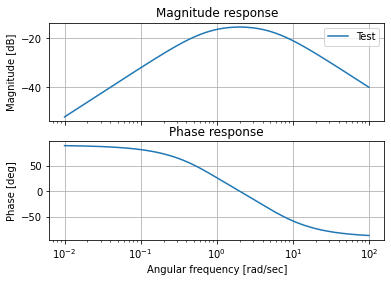

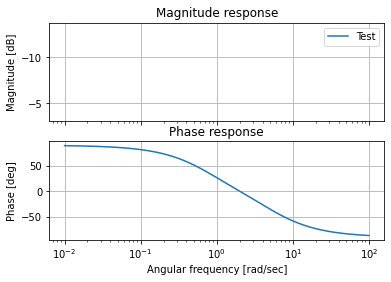

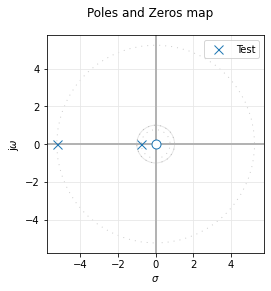

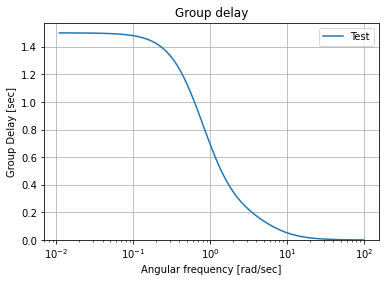

In [4]:
num = [ 1 , 0 ]
den = [ 1 , 6 , 4]


tf   = sig.TransferFunction(num,den)

pretty_print_lti(this_lti)

analyze_sys( [tf], ["Test" ])

### Implementación

\begin{equation}
\label{eqn:n21}\tag{21}
F_{s} = \frac{s}{s^{2} + s \cdot 6 + 4}
\end{equation}

Vamos a implementarlo con el siguiente filtro cuya transferencia normalizada es 

\begin{equation}
\label{eqn:n22}\tag{22}
F_{s} = \frac{G}{C} \cdot \frac{s \cdot \frac{G}{C}}{s^{2} + s \cdot \frac{G}{C} + 1}
\end{equation}

<img src="./fase.png" align="center" width="500<" />


$\Omega_w = 2 \cdot \pi \cdot 1KHz$
$\Omega_z = 1k\omega$

| Compo  | Valor nor | Valor |
| -- | -- | -- |
| R | $\frac{1}{3}$  | 333$\Omega$ | 
| C | 1 | 159.15 nf | 
| L | 1 | 159.15 mH |

### SImulación Circuital

<img src="./fase_bode.png" align="center" width="1000" />
